# Project Description

In [1]:
#Import required packages
import pandas as pd
import numpy as np
import string

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

C:\Users\nupur\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\nupur\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Step 2: Loading data

loan_df = pd.read_csv("C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/loan_data_2007_2014.csv", header=0, index_col=0)
print(f"Loan data contains {loan_df.shape[0]} rows and {loan_df.shape[1]} columns")

C:\Users\nupur\AppData\Local\Temp/ipykernel_2572/626428807.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/loan_data_2007_2014.csv", header=0, index_col=0)


Loan data contains 466285 rows and 74 columns


In [3]:
print("Sample rows from the source data :-")
loan_df.head()

Sample rows from the source data :-


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np

# Initialize the result DataFrame
result = pd.DataFrame(columns=['Column', 'DataType', 'Min', 'Max', 'NullCount'])

# List to capture columns with NullCount > 0
columns_with_nulls = []

# List to hold each row of data
data_rows = []

# Iterate through each column to gather the required information
for col in loan_df.columns:
    col_data = loan_df[col]
    dtype = col_data.dtype
    null_count = col_data.isnull().sum()
    
    # Initialize min and max as NaN
    min_val = np.nan
    max_val = np.nan
    
    # Calculate min and max only for numerical columns
    if np.issubdtype(dtype, np.number):
        min_val = col_data.min()
        max_val = col_data.max()
    
    # Capture columns with NullCount > 0
    if null_count > 0:
        columns_with_nulls.append(col)
        
    # Append the collected data to the data_rows list
    data_rows.append({
        'Column': col,
        'DataType': dtype,
        'Min': min_val,
        'Max': max_val,
        'NullCount': null_count
    })

# Create the result DataFrame using pd.DataFrame
result = pd.DataFrame(data_rows)

# Print the result DataFrame
print(result)

# Print columns with null values
print("Columns with NullCount > 0:", columns_with_nulls)


                         Column DataType       Min           Max  NullCount
0                            id    int64  54734.00  3.809811e+07          0
1                     member_id    int64  70473.00  4.086083e+07          0
2                     loan_amnt    int64    500.00  3.500000e+04          0
3                   funded_amnt    int64    500.00  3.500000e+04          0
4               funded_amnt_inv  float64      0.00  3.500000e+04          0
5                          term   object       NaN           NaN          0
6                      int_rate  float64      5.42  2.606000e+01          0
7                   installment  float64     15.67  1.409990e+03          0
8                         grade   object       NaN           NaN          0
9                     sub_grade   object       NaN           NaN          0
10                    emp_title   object       NaN           NaN      27588
11                   emp_length   object       NaN           NaN      21008
12          

In [5]:
# data has a lot of missingness and the features are not assigned their intutive datatypes, 
# hence next step is to handle missing values and do datatype conversion

In [6]:
## 2. Dependent Variable values

loan_status_counts = loan_df['loan_status'].value_counts()

loan_status_df = pd.DataFrame({
    'Loan Status': loan_status_counts.index,
    'Counts': loan_status_counts.values
})

loan_status_df

,Loan Status,Counts
0,Current,224226
1,Fully Paid,184739
2,Charged Off,42475
3,Late (31-120 days),6900
4,In Grace Period,3146
5,Does not meet the credit policy. Status:Fully ...,1988
6,Late (16-30 days),1218
7,Default,832
8,Does not meet the credit policy. Status:Charge...,761


In [7]:
# The goal of this project is to predict whether a borrower can pay off the installments or not, 
# so we need to process loan status field to create dependent variable

## 2. Data Preprocessing

### 2.1 Datatype Conversion

In [8]:
### convert object type to their appropriate types

object_type_variables = []
for col in loan_df.select_dtypes(include=['object']).columns:
    object_type_variables.append(col)

print(f"{len(object_type_variables)} object type variables are to be convert into their actual type")
print(object_type_variables)

22 object type variables are to be convert into their actual type
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


In [9]:
# 1. term

loan_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [10]:
# as the field takes only 2 values, remove months from the field and convert it to integer

loan_df['term']=loan_df['term'].str.replace('months', '')
print(loan_df['term'].unique())
loan_df['term'] = loan_df['term'].astype(int)
print(loan_df['term'].unique())

[' 36 ' ' 60 ']
[36 60]


In [11]:
# 2. grade

loan_df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [12]:
# Convert grade to string

loan_df['grade'] = loan_df['grade']
loan_df['grade'] = loan_df['grade'].astype("string")
loan_df['grade'].unique()

<StringArray>
['B', 'C', 'A', 'E', 'F', 'D', 'G']
Length: 7, dtype: string

In [13]:
# 3. sub_grade

loan_df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [14]:
loan_df['sub_grade'] = loan_df['sub_grade']
loan_df['sub_grade'] = loan_df['sub_grade'].astype("string")
loan_df['sub_grade'].unique()

# at the time of preprocessing, we will convert these columns to numeric through onehot encoding

<StringArray>
['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1', 'A1', 'B3',
 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3', 'D4', 'F3', 'E3', 'F4',
 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1', 'F5', 'G5']
Length: 35, dtype: string

In [15]:
# 4. emp_title

loan_df['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'MecÃ¡nica',
       'Chief of Interpretation (Park Ranger)', 'Server Engineer Lead'],
      dtype=object)

In [16]:
loan_df['emp_title'] = loan_df['emp_title']
loan_df['emp_title'] = loan_df['emp_title'].astype("string")
loan_df['emp_title'].unique()

<StringArray>
[                                   <NA>,
                                 'Ryder',
                   'AIR RESOURCES BOARD',
              'University Medical Group',
                  'Veolia Transportaton',
             'Southern Star Photography',
                       'MKC Accounting ',
                             'Starbucks',
                 'Southwest Rural metro',
                                  'UCLA',
 ...
                     'Gen Sales Manager',
                        'DAY CARE OWNER',
                 'Real Estate Associate',
                    'Sr. ProjectManager',
     'President, CEO, CFO, VP, Director',
                                 'C N A',
                            'Lead sales',
                             'MecÃ¡nica',
 'Chief of Interpretation (Park Ranger)',
                  'Server Engineer Lead']
Length: 205476, dtype: string

In [17]:
# 5. 'emp_length'
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
# since there is only one category for 10+, we will keep it as 10 that will represent everything >=10
# in the same way, there is only one category for everything <1 year, we will give it a constant numeric value 0.5 and convert it to numeric
loan_df['emp_length'] = loan_df['emp_length'].str.replace('years', '')
loan_df['emp_length'] = loan_df['emp_length'].str.replace('year', '')
loan_df['emp_length'] = loan_df['emp_length'].str.strip()
loan_df.loc[loan_df["emp_length"] == '10+', "emp_length"] = '10'
loan_df.loc[loan_df["emp_length"] == '< 1', "emp_length"] = '0.5'
loan_df['emp_length'].unique()

array(['10', '0.5', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [19]:
loan_df['emp_length'] = loan_df['emp_length'].astype("float")
loan_df['emp_length'].unique()

array([10. ,  0.5,  1. ,  3. ,  8. ,  9. ,  4. ,  5. ,  6. ,  2. ,  7. ,
        nan])

In [20]:
# 6. 'home_ownership'
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [21]:
loan_df['home_ownership'] = loan_df['home_ownership'].astype("string")
loan_df['home_ownership'].unique()

<StringArray>
['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY']
Length: 6, dtype: string

In [22]:
# 7. 'verification_status'
loan_df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [23]:
loan_df['verification_status'] = loan_df['verification_status'].astype("string")
loan_df['verification_status'].unique()

<StringArray>
['Verified', 'Source Verified', 'Not Verified']
Length: 3, dtype: string

In [24]:
# 8. 'issue_d'
loan_df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [25]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['issue_d'].unique()

<DatetimeArray>
['2011-12-01 00:00:00', '2011-11-01 00:00:00', '2011-10-01 00:00:00',
 '2011-09-01 00:00:00', '2011-08-01 00:00:00', '2011-07-01 00:00:00',
 '2011-06-01 00:00:00', '2011-05-01 00:00:00', '2011-04-01 00:00:00',
 '2011-03-01 00:00:00', '2011-02-01 00:00:00', '2011-01-01 00:00:00',
 '2010-12-01 00:00:00', '2010-11-01 00:00:00', '2010-10-01 00:00:00',
 '2010-09-01 00:00:00', '2010-08-01 00:00:00', '2010-07-01 00:00:00',
 '2010-06-01 00:00:00', '2010-05-01 00:00:00', '2010-04-01 00:00:00',
 '2010-03-01 00:00:00', '2010-02-01 00:00:00', '2010-01-01 00:00:00',
 '2009-12-01 00:00:00', '2009-11-01 00:00:00', '2009-10-01 00:00:00',
 '2009-09-01 00:00:00', '2009-08-01 00:00:00', '2009-07-01 00:00:00',
 '2009-06-01 00:00:00', '2009-05-01 00:00:00', '2009-04-01 00:00:00',
 '2009-03-01 00:00:00', '2009-02-01 00:00:00', '2009-01-01 00:00:00',
 '2008-12-01 00:00:00', '2008-11-01 00:00:00', '2008-10-01 00:00:00',
 '2008-09-01 00:00:00', '2008-08-01 00:00:00', '2008-07-01 00:00:00',
 '20

In [26]:
# 9. 'loan_status'

loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [27]:
good_loans = ['Current', 'Fully Paid', 'In Grace Period','Does not meet the credit policy. Status:Fully Paid']

# create new column to classify ending
loan_df['good_bad_loan'] = np.where(loan_df['loan_status'].isin(good_loans), 1, 0)

loan_df = loan_df.drop(columns=['loan_status'])

In [28]:
#Checking class imbalance
class_imbalance_ratio = len(loan_df[loan_df['good_bad_loan'] == 0])*100 /len(loan_df[loan_df['good_bad_loan'] == 1])
print(class_imbalance_ratio)

#For every 100 good loan there are 12 bad loans. There are several methods to handle data imbalance -
#1. During sampling 
    #1.1 Under Sampling : Keep all instances of minority class and select few instances of majority class.
    #1.2 Super Sampling : Keep all instances of majority class and replicate instances of minority class.
#2. During Model Training
    # 2.1 Regularization/Pruning 
#3. During Model Evolution
    #3.1 Usage of precision recall instead of accuracy
    
# For our model we will perform under sampling since we have sufficient number of instances of minority class for model training
# We will also implement regularization to avoid overfitting due to class imbalance. 
# We will use precision and recall as evolution matrix.

12.602300416084077


In [29]:
loan_df['good_bad_loan'].unique()

array([1, 0])

In [30]:
# 10. 'pymnt_plan'

loan_df['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [31]:
loan_df['pymnt_plan'] = loan_df['pymnt_plan'].astype("string")
loan_df['pymnt_plan'].unique()

<StringArray>
['n', 'y']
Length: 2, dtype: string

In [32]:
# 11. 'url'

loan_df['url'].unique()

array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175',
       ...,
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=9584776',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=9604874',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=9199665'],
      dtype=object)

In [33]:
loan_df['url'] = loan_df['url'].astype("string")
loan_df['url'].unique()

<StringArray>
['https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1069639',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1072053',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1071795',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1071570',
 ...
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=9715141',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=9695736',
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=9007579',
 'https://www.lendingclub.com/br

In [34]:
# 12. 'desc'

loan_df['desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       '  Borrower added on 12/09/13 > consolidate all credit accounts<br>',
       '  Borrower added on 12/06/13 > I am going to consolidate a credit card debt from medical and moving expenses with a loan I already have. I have paid everything on time for years, I just need to eliminate this

In [35]:
loan_df['desc'] = loan_df['desc'].astype("string")
loan_df['desc'].unique()

<StringArray>
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                '  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon 

In [36]:
# 13. 'purpose'

loan_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [37]:
loan_df['purpose'] = loan_df['purpose'].astype("string")
loan_df['purpose'].unique()

<StringArray>
[       'credit_card',                'car',     'small_business',
              'other',            'wedding', 'debt_consolidation',
   'home_improvement',     'major_purchase',            'medical',
             'moving',           'vacation',              'house',
   'renewable_energy',        'educational']
Length: 14, dtype: string

In [38]:
# 14. 'title'

loan_df['title'].unique()

array(['Computer', 'bike', 'real estate business', ..., 'LoanGetter',
       'Consolidation 01', 'Paying off the car and some bills'],
      dtype=object)

In [39]:
loan_df['title'] = loan_df['title'].astype("string")
loan_df['title'].unique()

<StringArray>
[                             'Computer',
                                  'bike',
                  'real estate business',
                              'personel',
                              'Personal',
 'My wedding loan I promise to pay back',
                                  'Loan',
                       'Car Downpayment',
  'Expand Business & Buy Debt Portfolio',
           'Building my credit history.',
 ...
   'Profitable Small Biz debt consolide',
                     'finish det payoff',
                     'Stop the bleeding',
                      'consolidate once',
                                  'Laon',
                       'Financially Fit',
                     'Catch me up again',
                            'LoanGetter',
                      'Consolidation 01',
     'Paying off the car and some bills']
Length: 63099, dtype: string

In [40]:
# 15. 'zip_code'

loan_df['zip_code'].unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       '928xx', '233

In [41]:
loan_df['zip_code'] = loan_df['zip_code'].astype("string")
loan_df['zip_code'].unique()

<StringArray>
['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx', '900xx',
 '958xx', '774xx',
 ...
 '524xx', '889xx', '092xx', '510xx', '909xx', '516xx', '043xx', '587xx',
 '511xx', '901xx']
Length: 888, dtype: string

In [42]:
# 16. 'addr_state'

loan_df['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [43]:
loan_df['addr_state'] = loan_df['addr_state'].astype("string")
loan_df['addr_state'].unique()

<StringArray>
['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL', 'NY',
 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA', 'WA', 'WI', 'AL', 'CO',
 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI', 'DC', 'SD', 'NH', 'AR', 'NM', 'MT',
 'HI', 'WY', 'OK', 'DE', 'MS', 'TN', 'IA', 'NE', 'ID', 'IN', 'ME']
Length: 50, dtype: string

In [44]:
# 17. 'earliest_cr_line'

loan_df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [45]:
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')
loan_df['earliest_cr_line'].unique()

<DatetimeArray>
['1985-01-01 00:00:00', '1999-04-01 00:00:00', '2001-11-01 00:00:00',
 '1996-02-01 00:00:00', '1996-01-01 00:00:00', '2004-11-01 00:00:00',
 '2005-07-01 00:00:00', '2007-01-01 00:00:00', '2004-04-01 00:00:00',
 '2004-09-01 00:00:00',
 ...
 '2054-01-01 00:00:00', '2057-01-01 00:00:00', '2044-01-01 00:00:00',
 '2050-10-01 00:00:00', '2048-01-01 00:00:00', '2061-07-01 00:00:00',
 '2058-05-01 00:00:00', '2053-01-01 00:00:00', '2050-05-01 00:00:00',
 '2056-11-01 00:00:00']
Length: 665, dtype: datetime64[ns]

In [46]:
# 18. 'initial_list_status'

loan_df['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [47]:
loan_df['initial_list_status'] = loan_df['initial_list_status'].astype("string")
loan_df['initial_list_status'].unique()

<StringArray>
['f', 'w']
Length: 2, dtype: string

In [48]:
# 19. 'last_pymnt_d'

loan_df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

In [49]:
loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'], format='%b-%y')
loan_df['last_pymnt_d'].unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2013-04-01 00:00:00', '2014-06-01 00:00:00',
 '2016-01-01 00:00:00', '2012-04-01 00:00:00', '2012-11-01 00:00:00',
 '2013-06-01 00:00:00', '2013-09-01 00:00:00', '2012-07-01 00:00:00',
 '2013-10-01 00:00:00', '2013-05-01 00:00:00', '2015-02-01 00:00:00',
 '2015-08-01 00:00:00', '2012-10-01 00:00:00', '2012-09-01 00:00:00',
                 'NaT', '2012-12-01 00:00:00', '2014-12-01 00:00:00',
 '2013-08-01 00:00:00', '2013-11-01 00:00:00', '2014-01-01 00:00:00',
 '2014-04-01 00:00:00', '2014-08-01 00:00:00', '2014-10-01 00:00:00',
 '2012-08-01 00:00:00', '2014-07-01 00:00:00', '2013-07-01 00:00:00',
 '2015-04-01 00:00:00', '2014-02-01 00:00:00', '2014-09-01 00:00:00',
 '2012-06-01 00:00:00', '2013-02-01 00:00:00', '2013-03-01 00:00:00',
 '2014-05-01 00:00:00', '2015-03-01 00:00:00', '2013-01-01 00:00:00',
 '2013-12-01 00:00:00', '2012-02-01 00:00:00', '2014-03-01 00:00:00',
 '2015-09-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
 '20

In [50]:
# 20. 'next_pymnt_d'

loan_df['next_pymnt_d'].unique()

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [51]:
loan_df['next_pymnt_d'] = pd.to_datetime(loan_df['next_pymnt_d'], format='%b-%y')
loan_df['next_pymnt_d'].unique()

<DatetimeArray>
[                'NaT', '2016-02-01 00:00:00', '2016-01-01 00:00:00',
 '2013-09-01 00:00:00', '2014-02-01 00:00:00', '2014-05-01 00:00:00',
 '2013-06-01 00:00:00', '2012-03-01 00:00:00', '2012-04-01 00:00:00',
 '2013-05-01 00:00:00',
 ...
 '2008-08-01 00:00:00', '2008-06-01 00:00:00', '2008-07-01 00:00:00',
 '2008-04-01 00:00:00', '2008-05-01 00:00:00', '2008-02-01 00:00:00',
 '2008-01-01 00:00:00', '2008-03-01 00:00:00', '2007-12-01 00:00:00',
 '2016-03-01 00:00:00']
Length: 101, dtype: datetime64[ns]

In [52]:
# 21. 'last_credit_pull_d'


loan_df['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [53]:
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y')
loan_df['last_credit_pull_d'].unique()

<DatetimeArray>
['2016-01-01 00:00:00', '2013-09-01 00:00:00', '2015-01-01 00:00:00',
 '2015-09-01 00:00:00', '2014-12-01 00:00:00', '2012-08-01 00:00:00',
 '2013-03-01 00:00:00', '2015-12-01 00:00:00', '2013-08-01 00:00:00',
 '2012-11-01 00:00:00',
 ...
 '2008-02-01 00:00:00', '2008-01-01 00:00:00', '2007-12-01 00:00:00',
 '2008-07-01 00:00:00', '2007-10-01 00:00:00', '2007-09-01 00:00:00',
 '2007-06-01 00:00:00', '2007-05-01 00:00:00', '2007-07-01 00:00:00',
 '2007-11-01 00:00:00']
Length: 104, dtype: datetime64[ns]

In [54]:
# 22. 'application_type'

loan_df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [55]:
loan_df['application_type'] = loan_df['application_type'].astype('string')
loan_df['application_type'].unique()

<StringArray>
['INDIVIDUAL']
Length: 1, dtype: string

In [56]:
# All the columns have been converted to their appropriate datatypes

# Print the datatype of each column
for column in loan_df.columns:
    print(f"'{column}': {loan_df[column].dtype}")

'id': int64
'member_id': int64
'loan_amnt': int64
'funded_amnt': int64
'funded_amnt_inv': float64
'term': int32
'int_rate': float64
'installment': float64
'grade': string
'sub_grade': string
'emp_title': string
'emp_length': float64
'home_ownership': string
'annual_inc': float64
'verification_status': string
'issue_d': datetime64[ns]
'pymnt_plan': string
'url': string
'desc': string
'purpose': string
'title': string
'zip_code': string
'addr_state': string
'dti': float64
'delinq_2yrs': float64
'earliest_cr_line': datetime64[ns]
'inq_last_6mths': float64
'mths_since_last_delinq': float64
'mths_since_last_record': float64
'open_acc': float64
'pub_rec': float64
'revol_bal': int64
'revol_util': float64
'total_acc': float64
'initial_list_status': string
'out_prncp': float64
'out_prncp_inv': float64
'total_pymnt': float64
'total_pymnt_inv': float64
'total_rec_prncp': float64
'total_rec_int': float64
'total_rec_late_fee': float64
'recoveries': float64
'collection_recovery_fee': float64
'last_p

### 2.2 Missing Value Handling

In [57]:
# Getting rid off id columns 

# id
# member_id
# emp_title
# url
# zip_code
# addr_state

columns_to_drop =   ['id','member_id','emp_title','url','zip_code','addr_state']
loan_df = loan_df.drop(columns=columns_to_drop)

In [58]:
# drop constants

single_value_columns = []
for column in loan_df.columns:
    if loan_df[column].nunique() == 1:
        single_value_columns.append(column)

# Print the columns with only a single unique value
print("Columns with only a single unique value:", single_value_columns)

loan_df = loan_df.drop(columns= single_value_columns)

Columns with only a single unique value: ['policy_code', 'application_type']


In [59]:
# drop all null columns

all_null_columns = loan_df.columns[loan_df.isnull().all()].tolist()
loan_df = loan_df.drop(columns=all_null_columns)

In [60]:
# Initialize lists to capture columns with null values and all null columns
columns_with_null = []

# Initialize a DataFrame to store the summary
summary_data = []

# Loop through each column
for column in loan_df.columns:
    # Determine data type and handle accordingly
    dtype = loan_df[column].dtype
    
    # Calculate min, max, and null count
    if pd.api.types.is_numeric_dtype(dtype):
        min_value = loan_df[column].min()
        max_value = loan_df[column].max()
    else:
        min_value = None
        max_value = None
    
    null_count = loan_df[column].isnull().sum()
    
    # Append column name to list if null count > 0
    if null_count > 0:
        columns_with_null.append(column)
    
    # Append summary data
    summary_data.append({
        'Column': column,
        'DataType': str(dtype),
        'NullCount': null_count
    })

# Print summary table
summary_df = pd.DataFrame(summary_data)
print(summary_df)

# Print columns with null values
print("\nColumns with null values:", columns_with_null)

                         Column        DataType  NullCount
0                     loan_amnt           int64          0
1                   funded_amnt           int64          0
2               funded_amnt_inv         float64          0
3                          term           int32          0
4                      int_rate         float64          0
5                   installment         float64          0
6                         grade          string          0
7                     sub_grade          string          0
8                    emp_length         float64      21008
9                home_ownership          string          0
10                   annual_inc         float64          4
11          verification_status          string          0
12                      issue_d  datetime64[ns]          0
13                   pymnt_plan          string          0
14                         desc          string     340304
15                      purpose          string         

In [61]:
# continuous numerical columns to be imputed by mean

mean_imputation_col = ['delinq_2yrs','inq_last_6mths','open_acc','pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

loan_df[mean_imputation_col] = loan_df[mean_imputation_col].fillna(loan_df[mean_imputation_col].mean())

In [62]:
## All the months since columns should be null since the event hasn't happened so we will impute them
# using the max value + 1

months_since = ['mths_since_last_major_derog','mths_since_last_record','mths_since_last_delinq']

for column in months_since:
    loan_df[column] = loan_df[column].fillna(loan_df[column].max()+1)

In [63]:
# when last_credit_pull_d is null, most likely the credit has never been pulled, we could impute null values to
# an older date from the oldest date

loan_df['last_credit_pull_d'] = loan_df['last_credit_pull_d'].fillna(loan_df['last_credit_pull_d'].min()- pd.Timedelta(days=1))

In [64]:
# these two columns are not predictors 

loan_df.drop(['last_pymnt_d','next_pymnt_d'], axis=1, inplace=True)

In [65]:
# if 'desc' and 'title' isn't provided as the reason to borrow the loan, that has potential of risky loan
# hence not deleting the records

loan_df['title'] = loan_df['title'].fillna('')
loan_df['desc'] = loan_df['desc'].fillna('')

In [66]:
# 'emp_length' being null could indicate that borrower is not currently employed but they 
# may have other sources of income to afford the loan

loan_df['emp_length'] = loan_df['emp_length'].fillna(0)

In [67]:
# 'annual_inc' being null may mean lack of income proof, or is student but may have other sources of income 
# like family income

loan_df['annual_inc'] = loan_df['annual_inc'].fillna(0)

In [68]:
# earliest_cr_line missing might indicate applicant doesn't have any credit line and older credit line makes
# applicant more trustworthy so we will impute earliest_cr_line values with most recent date available

loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].fillna(loan_df['earliest_cr_line'].max()+ pd.Timedelta(days=1))

In [69]:
## all the date columns can't be used as features and thus we will derive better predictors from date columns

from datetime import datetime

date_columns = ['issue_d', 'earliest_cr_line', 'last_credit_pull_d']

loan_df['day_since_issuance'] = (loan_df['issue_d'] - pd.to_datetime(datetime.today().date())).dt.days
loan_df['day_since_last_credit_pull'] = (loan_df['last_credit_pull_d'] - pd.to_datetime(datetime.today().date())).dt.days
loan_df['credit_age_days'] = (loan_df['earliest_cr_line'] - pd.to_datetime(datetime.today().date())).dt.days

loan_df = loan_df.drop(columns=date_columns)

In [70]:
# Initialize lists to capture columns with null values and all null columns
columns_with_null = []

# Initialize a DataFrame to store the summary
summary_data = []

# Loop through each column
for column in loan_df.columns:
    # Determine data type and handle accordingly
    dtype = loan_df[column].dtype
    
    # Calculate min, max, and null count
    if pd.api.types.is_numeric_dtype(dtype):
        min_value = loan_df[column].min()
        max_value = loan_df[column].max()
    else:
        min_value = None
        max_value = None
    
    null_count = loan_df[column].isnull().sum()
    
    # Append column name to list if null count > 0
    if null_count > 0:
        columns_with_null.append(column)
    
    # Append summary data
    summary_data.append({
        'Column': column,
        'DataType': str(dtype),
        'NullCount': null_count
    })

# Print summary table
summary_df = pd.DataFrame(summary_data)
print(summary_df)

# Print columns with null values
print("\nColumns with null values:", columns_with_null)

                         Column DataType  NullCount
0                     loan_amnt    int64          0
1                   funded_amnt    int64          0
2               funded_amnt_inv  float64          0
3                          term    int32          0
4                      int_rate  float64          0
5                   installment  float64          0
6                         grade   string          0
7                     sub_grade   string          0
8                    emp_length  float64          0
9                home_ownership   string          0
10                   annual_inc  float64          0
11          verification_status   string          0
12                   pymnt_plan   string          0
13                         desc   string          0
14                      purpose   string          0
15                        title   string          0
16                          dti  float64          0
17                  delinq_2yrs  float64          0
18          

### 2.3 Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']

# Dictionary to store the encoders
encoders = {}

# Encode each categorical column and store the encoders
for col in columns_to_encode:
    le = LabelEncoder()
    loan_df[col] = le.fit_transform(loan_df[col])
    encoders[col] = le

In [72]:
loan_df[columns_to_encode].head()

,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status
0,1,6,5,2,0,1,0
1,2,13,5,1,0,0,0
2,2,14,5,0,0,11,0
3,2,10,5,1,0,9,0
4,1,9,5,1,0,9,0


In [73]:
# Print the encoders for later use
print("Encoders:", encoders)

Encoders: {'grade': LabelEncoder(), 'sub_grade': LabelEncoder(), 'home_ownership': LabelEncoder(), 'verification_status': LabelEncoder(), 'pymnt_plan': LabelEncoder(), 'purpose': LabelEncoder(), 'initial_list_status': LabelEncoder()}


In [74]:
# title and purpose columns to be processed part of NLP

In [75]:
loan_df['pymnt_plan'].unique()

array([0, 1])

### 2.4 Scaling/ Normalization

In [76]:
columns_to_normalize = ['purpose','dti', 'delinq_2yrs', 'inq_last_6mths','mths_since_last_delinq',
       'mths_since_last_record', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med','mths_since_last_major_derog', 'acc_now_delinq',
       'tot_coll_amt','tot_cur_bal', 'total_rev_hi_lim','day_since_issuance', 'day_since_last_credit_pull',
       'credit_age_days','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate','installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership','annual_inc', 'verification_status', 'pymnt_plan']

In [77]:
len(columns_to_normalize)

44

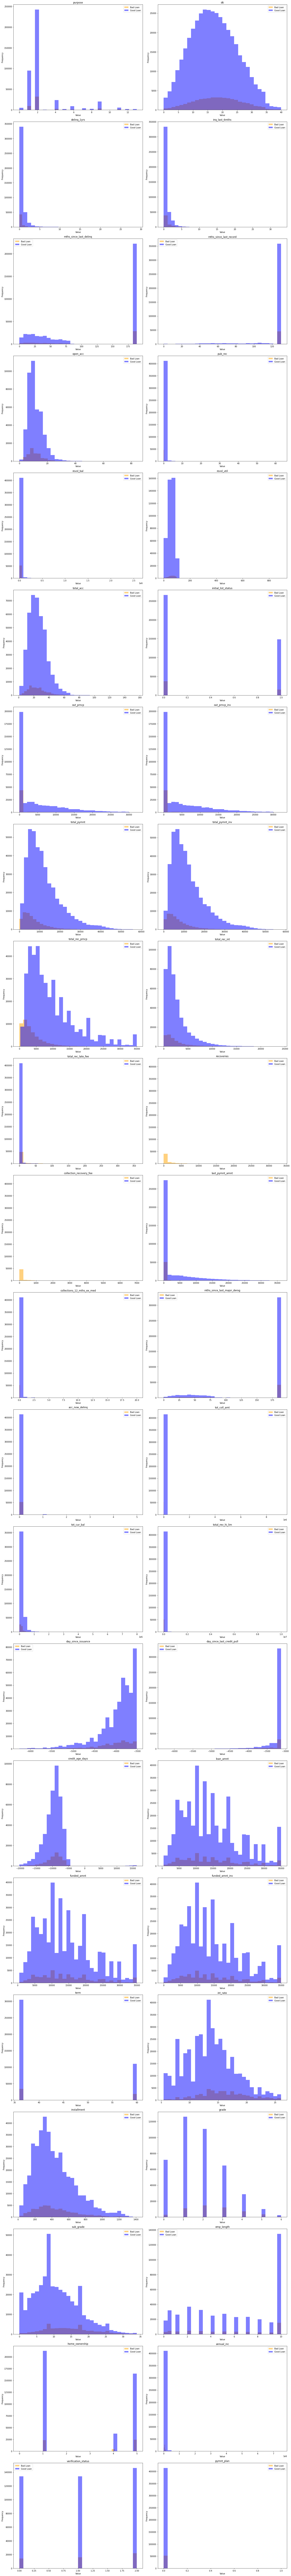

In [78]:
import matplotlib.pyplot as plt

# distribution with respect to loan status

# Number of columns to plot per row
columns_per_row = 2

# Calculate the number of rows needed
num_rows = int(np.ceil(len(columns_to_normalize) / columns_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, 8 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column distribution based on loan_status
for idx, col in enumerate(columns_to_normalize):
    ax = axes[idx]
    loan_df[loan_df['good_bad_loan'] == 0][col].plot(kind='hist', bins=30, alpha=0.5, ax=ax, color='orange', label='Bad Loan')
    loan_df[loan_df['good_bad_loan'] == 1][col].plot(kind='hist', bins=30, alpha=0.5, ax=ax, color='blue', label='Good Loan')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove any unused subplots
for i in range(len(columns_to_normalize), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [79]:
data_leakage = ['recoveries', 'collection_recovery_fee']
loan_df = loan_df.drop(columns = data_leakage)

In [80]:
columns_to_normalize = ['purpose','dti', 'delinq_2yrs', 'inq_last_6mths','mths_since_last_delinq',
       'mths_since_last_record', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int','total_rec_late_fee','last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq','tot_coll_amt','tot_cur_bal', 'total_rev_hi_lim',
       'day_since_issuance', 'day_since_last_credit_pull','credit_age_days','loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate','installment','grade', 'sub_grade', 'emp_length',
       'home_ownership','annual_inc', 'verification_status', 'pymnt_plan']

In [81]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
loan_df[columns_to_normalize] = scaler.fit_transform(loan_df[columns_to_normalize])

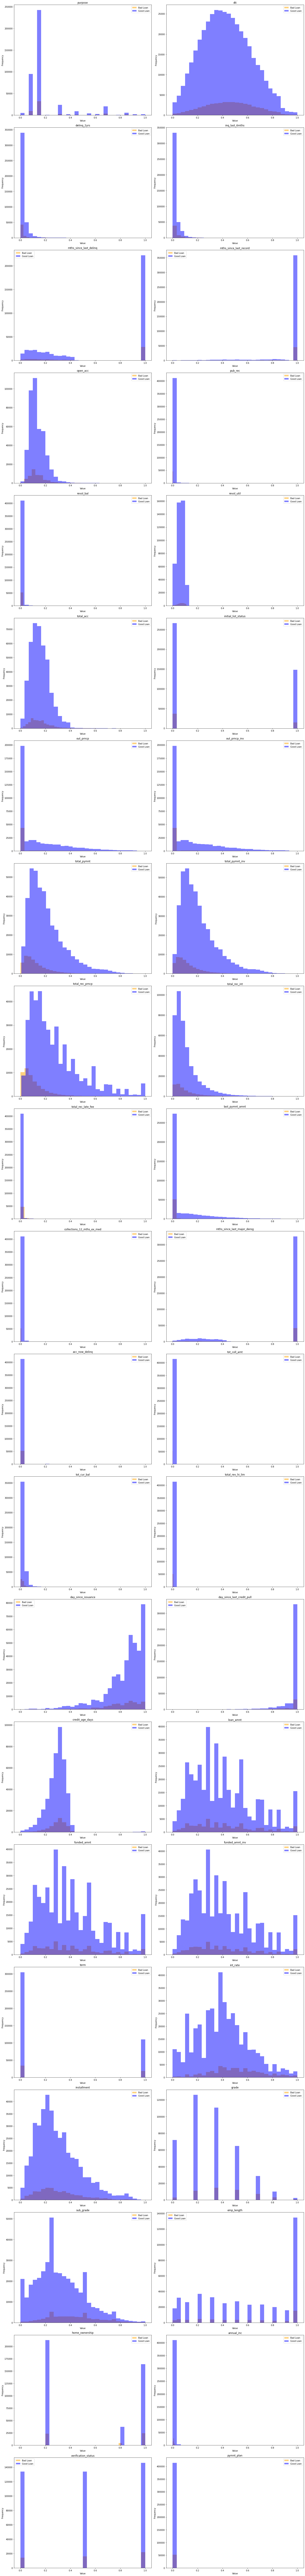

In [82]:
# plot after scaling

# Number of columns to plot per row
columns_per_row = 2

# Calculate the number of rows needed
num_rows = int(np.ceil(len(columns_to_normalize) / columns_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, 8 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column distribution based on loan_status
for idx, col in enumerate(columns_to_normalize):
    ax = axes[idx]
    loan_df[loan_df['good_bad_loan'] == 0][col].plot(kind='hist', bins=30, alpha=0.5, ax=ax, color='orange', label='Bad Loan')
    loan_df[loan_df['good_bad_loan'] == 1][col].plot(kind='hist', bins=30, alpha=0.5, ax=ax, color='blue', label='Good Loan')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove any unused subplots
for i in range(len(columns_to_normalize), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [83]:
loan_df['title'].isnull().sum()

0

## 4. Feature Engineering

### 4.1 Leaky columns

In [84]:
# Calculate correlations between each feature and the target variable

columns_to_engineer = columns_to_normalize
df_copy = loan_df[columns_to_engineer + ['good_bad_loan']]
correlations = df_copy.drop('good_bad_loan', axis=1).apply(lambda x: x.corr(df_copy['good_bad_loan']))

# Identify columns with suspiciously high correlation (adjust threshold as needed)
leaky_columns = correlations[correlations.abs() > 0.8].index.tolist()

print("Potential leaky columns:")
print(leaky_columns)

Potential leaky columns:
[]


### 4.2 Correlation Analysis

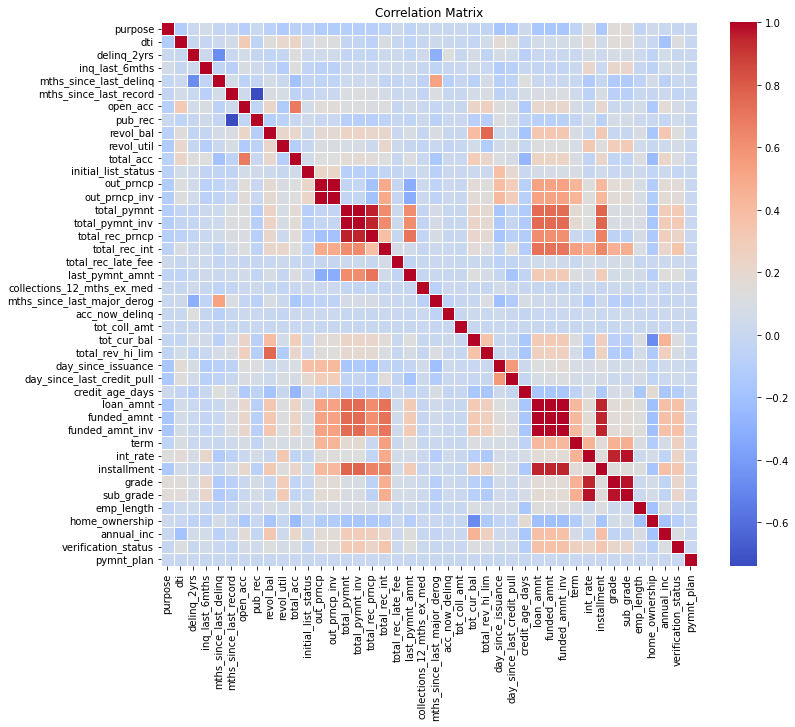

In [85]:
# Compute the correlation matrix

import seaborn as sns

corr_matrix = df_copy.drop('good_bad_loan', axis=1).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cbar=True,cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [86]:
# List to store pairs of columns with correlation higher than 0.7
high_corr_columns = []

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  # Check absolute correlation value
            high_corr_columns.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Print pairs of columns with correlation higher than 0.7
print("Pairs of columns with correlation > 0.7:")
for pair in high_corr_columns:
    print(pair)

Pairs of columns with correlation > 0.7:
('mths_since_last_record', 'pub_rec')
('revol_bal', 'total_rev_hi_lim')
('out_prncp', 'out_prncp_inv')
('total_pymnt', 'total_pymnt_inv')
('total_pymnt', 'total_rec_prncp')
('total_pymnt', 'loan_amnt')
('total_pymnt', 'funded_amnt')
('total_pymnt', 'funded_amnt_inv')
('total_pymnt', 'installment')
('total_pymnt_inv', 'total_rec_prncp')
('total_pymnt_inv', 'loan_amnt')
('total_pymnt_inv', 'funded_amnt')
('total_pymnt_inv', 'funded_amnt_inv')
('total_pymnt_inv', 'installment')
('total_rec_prncp', 'last_pymnt_amnt')
('total_rec_int', 'loan_amnt')
('total_rec_int', 'funded_amnt')
('total_rec_int', 'funded_amnt_inv')
('loan_amnt', 'funded_amnt')
('loan_amnt', 'funded_amnt_inv')
('loan_amnt', 'installment')
('funded_amnt', 'funded_amnt_inv')
('funded_amnt', 'installment')
('funded_amnt_inv', 'installment')
('int_rate', 'grade')
('int_rate', 'sub_grade')
('grade', 'sub_grade')


### 4.3 Handling Multicollinearity

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Calculate VIF for each predictor variable
def calculate_vif(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["vif"] = [variance_inflation_factor(scaled_data, i) for i in range(df.shape[1])]
    return vif_data

vif_result = calculate_vif(df_copy[columns_to_normalize])

# Print features with VIF > 10 (threshold can be adjusted)
high_vif_features = vif_result[vif_result['vif'] > 10]['feature'].tolist()
print("Features with high VIF (> 10):", high_vif_features)

Features with high VIF (> 10): ['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'grade', 'sub_grade']


In [88]:
column_to_remove = ['total_pymnt', 'total_pymnt_inv','total_rec_int', 'funded_amnt', 'loan_amnt',
                    'sub_grade','out_prncp_inv','funded_amnt_inv','grade','pub_rec',
                    'pub_rec','total_rev_hi_lim','total_rec_prncp']
df_copy = df_copy.drop(columns=column_to_remove)

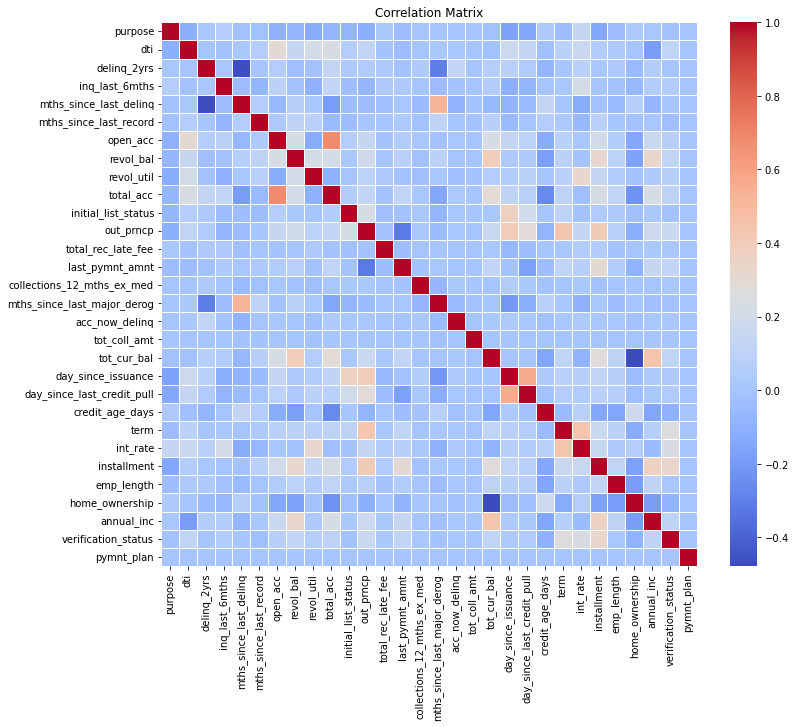

In [89]:
# check for multicollinearity after dropping highly correlated features

corr_matrix = df_copy.drop('good_bad_loan', axis=1).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cbar=True,cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [90]:
# finally drop highly correlated columns in actual dataset

loan_df = loan_df.drop(columns=column_to_remove)

In [91]:
numeric_columns = ['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_rec_late_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'day_since_issuance', 'day_since_last_credit_pull', 'credit_age_days']

### Machine Learning


In [92]:
loan_df.head()

,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,good_bad_loan,day_since_issuance,day_since_last_credit_pull,credit_age_days
0,0.0,0.253391,0.105571,1.00,1.0,0.003200,1.0,0.0,Borrower added on 12/22/11 > I need to upgra...,0.076923,Computer,0.691423,0.0,0.030303,1.000000,1.0,0.035714,0.005313,0.093803,0.051613,0.0,0.000000,0.000000,0.004736,0.0,1.0,0.0,0.000021,0.01735,1,0.6,1.000000,0.160132
1,1.0,0.477229,0.031671,0.05,1.0,0.004000,0.5,0.0,Borrower added on 12/22/11 > I plan to use t...,0.000000,bike,0.025006,0.0,0.151515,1.000000,1.0,0.035714,0.000657,0.010535,0.019355,0.0,0.000000,0.000000,0.003302,0.0,1.0,0.0,0.000021,0.01735,0,0.6,0.731061,0.302699
2,0.0,0.510659,0.049243,1.00,1.0,0.001634,0.0,0.0,,0.846154,real estate business,0.218055,0.0,0.060606,1.000000,1.0,0.023810,0.001151,0.110389,0.058065,0.0,0.000000,0.000000,0.017936,0.0,1.0,0.0,0.000021,0.01735,1,0.6,1.000000,0.328593
3,0.0,0.390988,0.232113,1.00,1.0,0.006560,0.5,0.0,Borrower added on 12/21/11 > to pay for prop...,0.692308,personel,0.500125,0.0,0.030303,0.185185,1.0,0.119048,0.002179,0.023535,0.232258,0.0,0.000000,0.047312,0.009866,0.0,1.0,0.0,0.000021,0.01735,1,0.6,0.884785,0.271051
4,1.0,0.352229,0.037380,0.10,1.0,0.010667,0.5,0.0,Borrower added on 12/21/11 > I plan on combi...,0.692308,Personal,0.448612,0.0,0.000000,0.201058,1.0,0.178571,0.010815,0.060406,0.238710,0.0,0.023846,0.000000,0.001871,0.0,1.0,0.0,0.000021,0.01735,1,0.6,1.000000,0.270201


In [94]:
loan_df=loan_df.drop(columns=['desc','title'])

In [97]:
#logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = loan_df.drop('good_bad_loan', axis=1)
y = loan_df['good_bad_loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Shape of X_train: (373028, 30)
Shape of y_train: (373028,)
Shape of X_test: (93257, 30)
Shape of y_test: (93257,)

Accuracy: 0.9237912435527628
Confusion Matrix:
[[ 4385  6042]
 [ 1065 81765]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.42      0.55     10427
           1       0.93      0.99      0.96     82830

    accuracy                           0.92     93257
   macro avg       0.87      0.70      0.76     93257
weighted avg       0.92      0.92      0.91     93257



In [98]:
#XG Boost
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost model
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9629411197014701
Confusion Matrix:
[[ 7695  2732]
 [  724 82106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     10427
           1       0.97      0.99      0.98     82830

    accuracy                           0.96     93257
   macro avg       0.94      0.86      0.90     93257
weighted avg       0.96      0.96      0.96     93257



In [102]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate on validation set
dt_val_preds = dt_classifier.predict(X_test)
print("Decision Tree Validation Accuracy:", accuracy_score(y_test, dt_val_preds))
print("Decision Tree Validation Confusion Matrix:\n", confusion_matrix(y_test, dt_val_preds))
print("Decision Tree Validation Classification Report:\n", classification_report(y_test, dt_val_preds))

Decision Tree Validation Accuracy: 0.9388356906183987
Decision Tree Validation Confusion Matrix:
 [[ 7686  2741]
 [ 2963 79867]]
Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     10427
           1       0.97      0.96      0.97     82830

    accuracy                           0.94     93257
   macro avg       0.84      0.85      0.85     93257
weighted avg       0.94      0.94      0.94     93257



### 4.4 Feature Selection

## Natural Language Processing

### Text Processing

In [103]:
loan_df = pd.read_csv('C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/cleaned_loan_df.csv')

C:\Users\nupur\AppData\Local\Temp/ipykernel_2572/2470922366.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/cleaned_loan_df.csv')


In [104]:
#removing repeated set of words with date
import re
loan_df['desc'] = loan_df['desc'].apply(lambda x: re.sub(r'Borrower added on \d{2}/\d{2}/\d{2} >\s*', '', str(x)) if pd.notna(x) else x)

In [105]:
loan_df['desc'] = loan_df['desc'].str.replace('<br>', '')

In [106]:
loan_df['desc'] = loan_df['desc'].fillna('')

In [107]:
loan_df.head()

,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,good_bad_loan,day_since_issuance,day_since_last_credit_pull,credit_age_days
0,0.0,0.253391,0.105571,1.00,1.0,0.003200,1.0,0.0,I need to upgrade my business technologies.,0.076923,Computer,0.691423,0.0,0.030303,1.000000,1.0,0.035714,0.005313,0.093803,0.051613,0.0,0.000000,0.000000,0.004736,0.0,1.0,0.0,0.000021,0.01735,1,0.6,1.000000,0.160132
1,1.0,0.477229,0.031671,0.05,1.0,0.004000,0.5,0.0,I plan to use this money to finance the moto...,0.000000,bike,0.025006,0.0,0.151515,1.000000,1.0,0.035714,0.000657,0.010535,0.019355,0.0,0.000000,0.000000,0.003302,0.0,1.0,0.0,0.000021,0.01735,0,0.6,0.731061,0.302699
2,0.0,0.510659,0.049243,1.00,1.0,0.001634,0.0,0.0,,0.846154,real estate business,0.218055,0.0,0.060606,1.000000,1.0,0.023810,0.001151,0.110389,0.058065,0.0,0.000000,0.000000,0.017936,0.0,1.0,0.0,0.000021,0.01735,1,0.6,1.000000,0.328593
3,0.0,0.390988,0.232113,1.00,1.0,0.006560,0.5,0.0,"to pay for property tax (borrow from friend,...",0.692308,personel,0.500125,0.0,0.030303,0.185185,1.0,0.119048,0.002179,0.023535,0.232258,0.0,0.000000,0.047312,0.009866,0.0,1.0,0.0,0.000021,0.01735,1,0.6,0.884785,0.271051
4,1.0,0.352229,0.037380,0.10,1.0,0.010667,0.5,0.0,I plan on combining three large interest bil...,0.692308,Personal,0.448612,0.0,0.000000,0.201058,1.0,0.178571,0.010815,0.060406,0.238710,0.0,0.023846,0.000000,0.001871,0.0,1.0,0.0,0.000021,0.01735,1,0.6,1.000000,0.270201


In [ ]:
loan_df.to_csv('C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/cleaned_loan_df.csv', index=False)

### 1. Word2Vec Encoding

In [1]:
#Import required packages

import pandas as pd
import numpy as np
import string

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

C:\Users\nupur\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\nupur\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
loan_df = pd.read_csv('C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/cleaned_loan_df.csv')

C:\Users\nupur\AppData\Local\Temp/ipykernel_20208/2470922366.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/cleaned_loan_df.csv')


In [3]:
loan_df = loan_df.drop(columns=['title'])

In [4]:
import gensim.downloader as api

# Load pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

In [5]:
#Tokenization and embedding conversion
import numpy as np
from gensim.utils import tokenize

def text_to_embedding(text):
    tokens = list(tokenize(text))  # Tokenize text
    embeddings = []
    for token in tokens:
        if token in word2vec_model.key_to_index:
            embeddings.append(word2vec_model.get_vector(token))  # Get Word2Vec embedding
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average embeddings if tokens found
    else:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no tokens found

# Convert text_column to embeddings
loan_df['text_embedding'] = loan_df['desc'].astype(str).apply(text_to_embedding)

In [6]:
embeddings = loan_df['text_embedding'].apply(pd.Series)

# Rename the embedding columns
embeddings.columns = [f'emb_{i+1}' for i in range(300)]

# Drop the original embedding column and concatenate the new columns
loan_df = loan_df.drop(columns=['text_embedding']).join(embeddings)

print(loan_df.head())

   term  int_rate  installment  emp_length  home_ownership  annual_inc  \
0   0.0  0.253391     0.105571        1.00             1.0    0.003200   
1   1.0  0.477229     0.031671        0.05             1.0    0.004000   
2   0.0  0.510659     0.049243        1.00             1.0    0.001634   
3   0.0  0.390988     0.232113        1.00             1.0    0.006560   
4   1.0  0.352229     0.037380        0.10             1.0    0.010667   

   verification_status  pymnt_plan  \
0                  1.0         0.0   
1                  0.5         0.0   
2                  0.0         0.0   
3                  0.5         0.0   
4                  0.5         0.0   

                                                desc   purpose       dti  \
0        I need to upgrade my business technologies.  0.076923  0.691423   
1    I plan to use this money to finance the moto...  0.000000  0.025006   
2                                                NaN  0.846154  0.218055   
3    to pay for proper

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [8]:
loan_df = loan_df.drop(columns=['desc'])

In [9]:
# Separate features (X) and target variable (y)
X = loan_df.drop('good_bad_loan', axis=1)
y = loan_df['good_bad_loan']

# Perform stratified sampling to create a balanced training set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Further split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
##Handle Class Imbalance
# import pandas as pd
# from sklearn.utils import resample

# # Combine X_train and y_train for resampling
# train_data = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# class_majority = train_data[train_data['good_bad_loan'] == 1]
# class_minority = train_data[train_data['good_bad_loan'] == 0]

# # Downsample majority class
# class_majority_downsampled = resample(class_majority,
#                                      replace=False,    # sample without replacement
#                                      n_samples=len(class_minority),  # to match minority class
#                                      random_state=42)  # reproducible results

# # Combine downsampled majority class with minority class
# train_downsampled = pd.concat([class_majority_downsampled, class_minority])

# # Separate X and y after downsampling
# X_train = train_downsampled.drop('good_bad_loan', axis=1)
# y_train = train_downsampled['good_bad_loan']

# # Optional: Check the new class distribution to ensure balance
# print(y_train.value_counts())

In [10]:
#train and evaluate Model
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate on validation set
dt_val_preds = dt_classifier.predict(X_val)
print("Decision Tree Validation Accuracy:", accuracy_score(y_val, dt_val_preds))
print("Decision Tree Validation Confusion Matrix:\n", confusion_matrix(y_val, dt_val_preds))
print("Decision Tree Validation Classification Report:\n", classification_report(y_val, dt_val_preds))

Decision Tree Validation Accuracy: 0.9333743190884005
Decision Tree Validation Confusion Matrix:
 [[ 5614  2214]
 [ 2446 59669]]
Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      7828
           1       0.96      0.96      0.96     62115

    accuracy                           0.93     69943
   macro avg       0.83      0.84      0.83     69943
weighted avg       0.93      0.93      0.93     69943



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_true = y_train  # Actual labels for training set
y_train_pred = dt_classifier.predict(X_train).flatten()  # Predicted labels for training set
y_val_true = y_val  # Actual labels for validation set
y_val_pred = dt_classifier.predict(X_val).flatten()  # Predicted labels for validation set

# Compute metrics for training set
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_f1 = f1_score(y_train_true, y_train_pred)

# Compute metrics for validation set
val_accuracy = accuracy_score(y_val_true, y_val_pred)
val_precision = precision_score(y_val_true, y_val_pred)
val_recall = recall_score(y_val_true, y_val_pred)
val_f1 = f1_score(y_val_true, y_val_pred)

# Confusion matrix for training and validation sets
train_confusion_matrix = confusion_matrix(y_train_true, y_train_pred)
val_confusion_matrix = confusion_matrix(y_val_true, y_val_pred)

# Print results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print("Confusion Matrix:")
print(val_confusion_matrix)

Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 36530      0]
 [     0 289869]]

Validation Metrics:
Accuracy: 0.9334
Precision: 0.9642
Recall: 0.9606
F1 Score: 0.9624
Confusion Matrix:
[[ 5614  2214]
 [ 2446 59669]]


In [12]:
#As per training metrics we can see that, the model is overfitted. We tune hyperparameters
# Pre-pruning: Create and train a decision tree with pre-pruning
pre_pruned_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
pre_pruned_dt.fit(X_train, y_train)

# Evaluate the pre-pruned tree on the validation set
pre_pruned_val_preds = pre_pruned_dt.predict(X_val)
print("Pre-Pruned Decision Tree Validation Accuracy:", accuracy_score(y_val, pre_pruned_val_preds))
print("Pre-Pruned Decision Tree Validation Confusion Matrix:\n", confusion_matrix(y_val, pre_pruned_val_preds))
print("Pre-Pruned Decision Tree Validation Classification Report:\n", classification_report(y_val, pre_pruned_val_preds))

Pre-Pruned Decision Tree Validation Accuracy: 0.9437827945612857
Pre-Pruned Decision Tree Validation Confusion Matrix:
 [[ 4724  3104]
 [  828 61287]]
Pre-Pruned Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.60      0.71      7828
           1       0.95      0.99      0.97     62115

    accuracy                           0.94     69943
   macro avg       0.90      0.80      0.84     69943
weighted avg       0.94      0.94      0.94     69943



In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_true = y_train  # Actual labels for training set
y_train_pred = pre_pruned_dt.predict(X_train).flatten()  # Predicted labels for training set
y_val_true = y_val  # Actual labels for validation set
y_val_pred = pre_pruned_dt.predict(X_val).flatten()  # Predicted labels for validation set

# Compute metrics for training set
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_f1 = f1_score(y_train_true, y_train_pred)

# Compute metrics for validation set
val_accuracy = accuracy_score(y_val_true, y_val_pred)
val_precision = precision_score(y_val_true, y_val_pred)
val_recall = recall_score(y_val_true, y_val_pred)
val_f1 = f1_score(y_val_true, y_val_pred)

# Confusion matrix for training and validation sets
train_confusion_matrix = confusion_matrix(y_train_true, y_train_pred)
val_confusion_matrix = confusion_matrix(y_val_true, y_val_pred)

# Print results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print("Confusion Matrix:")
print(val_confusion_matrix)

Training Metrics:
Accuracy: 0.9431
Precision: 0.9515
Recall: 0.9862
F1 Score: 0.9686
Confusion Matrix:
[[ 21958  14572]
 [  3992 285877]]

Validation Metrics:
Accuracy: 0.9438
Precision: 0.9518
Recall: 0.9867
F1 Score: 0.9689
Confusion Matrix:
[[ 4724  3104]
 [  828 61287]]


In [15]:
#XG Boost
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost model
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9626838997469368
Confusion Matrix:
[[ 5793  2035]
 [  575 61540]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      7828
           1       0.97      0.99      0.98     62115

    accuracy                           0.96     69943
   macro avg       0.94      0.87      0.90     69943
weighted avg       0.96      0.96      0.96     69943



In [16]:
#Logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9238379823570622
Confusion Matrix:
[[ 3311  4517]
 [  810 61305]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.42      0.55      7828
           1       0.93      0.99      0.96     62115

    accuracy                           0.92     69943
   macro avg       0.87      0.70      0.76     69943
weighted avg       0.92      0.92      0.91     69943



### 2 GloVe Embedding

In [56]:
#Import required packages

import pandas as pd
import numpy as np
import string

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
loan_df = pd.read_csv('C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/cleaned_loan_df.csv')

C:\Users\nupur\AppData\Local\Temp/ipykernel_20208/2470922366.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/cleaned_loan_df.csv')


In [58]:
import requests
import zipfile
import os

In [59]:
# def download_glove(url, extract_to='.'):
#     local_filename = url.split('/')[-1]
#     local_filepath = os.path.join(extract_to, local_filename)

#     # Download the file
#     print(f"Downloading {local_filename}...")
#     response = requests.get(url, stream=True)
#     with open(local_filepath, 'wb') as f:
#         for chunk in response.iter_content(chunk_size=128):
#             f.write(chunk)
#     print(f"Downloaded {local_filename}")

#     # Extract the zip file
#     print(f"Extracting {local_filename}...")
#     with zipfile.ZipFile(local_filepath, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)
#     print(f"Extracted to {extract_to}")

# # Example usage:
# glove_url = "http://nlp.stanford.edu/data/glove.840B.300d.zip"  # URL for the desired GloVe embeddings
extract_to_path = "C:/Users/nupur/OneDrive/Desktop/practicum"  # Update this to your desired directory
# os.makedirs(extract_to_path, exist_ok=True)
# download_glove(glove_url, extract_to_path)

In [60]:
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            try:
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs
            except ValueError:
                print(f"Skipping line: {line}")
    return embeddings_index

In [61]:
# Load the embeddings
glove_file = os.path.join(extract_to_path, 'glove.840B.300d.txt')  # You can choose other dimensions like 100d, 200d, etc.
embeddings_index = load_glove_embeddings(glove_file)

# Example usage
print(f"Loaded {len(embeddings_index)} word vectors.")
print(embeddings_index['hello'])  # Example: Get the vector for the word 'hello'

Skipping line: . . . -0.1573 -0.29517 0.30453 -0.54773 0.098293 -0.1776 0.21662 0.19261 -0.21101 0.53788 -0.047755 0.40675 0.023592 -0.32814 0.046858 0.19367 0.25565 -0.021019 -0.15957 -0.1023 0.20303 -0.043333 0.11618 -0.18486 0.0011948 -0.052301 0.34587 0.052335 0.16774 -0.21384 0.055947 0.24934 -0.12179 0.16749 0.28922 -0.033739 0.3015 -0.13241 0.092635 0.37155 -0.2884 -0.0052731 -0.001005 -0.51153 -0.28476 -0.20139 0.11837 -0.0055891 0.43604 0.16796 -0.2701 0.063957 -0.093253 -0.22079 0.36501 0.06545 0.23941 -0.19292 0.098293 0.12172 -0.1168 -0.027436 0.20507 -0.39139 -0.23111 0.46239 0.22888 -0.028415 -0.1798 0.23817 0.28093 -0.47935 0.23177 -0.35587 0.14246 0.11861 0.011018 0.091986 0.0054809 -0.39955 -0.40183 -0.10629 -0.30851 0.12383 -0.16737 -0.43569 0.4211 -0.57416 -0.19964 0.51312 0.090747 -0.21657 0.043519 0.24288 0.081134 0.49104 -0.33342 -0.31056 -0.3136 0.26931 -0.14402 0.33185 -0.21662 -0.072985 0.080603 -0.7266 -0.098385 -0.36233 -0.25346 0.1154 0.25738 0.15802 -0.1563

Skipping line: . . 0.035974 -0.024421 0.71402 -0.61127 0.012771 -0.11201 0.16847 -0.14069 -0.053491 -0.87539 -0.13959 0.29731 0.072308 -0.084514 -0.1879 0.12358 0.37639 -0.39238 -0.01111 -0.04924 0.63649 0.058814 0.19076 -0.20828 -0.11036 0.14934 0.24667 -0.39438 0.22853 -0.11201 0.33539 -0.32929 -0.049727 -0.090764 0.29095 0.27504 0.22802 -0.15616 0.37302 0.3752 -0.3677 0.1518 -0.27551 -0.63281 -0.31298 -0.22441 -0.15435 -0.64802 0.28404 0.12356 0.0034255 0.03094 0.35345 -0.46781 0.59203 -0.17966 0.27702 -0.46738 0.19438 0.21939 -0.36743 -0.084781 0.03253 -0.51323 -0.55466 0.49585 0.066985 0.47906 -0.25118 0.011123 0.15605 -1.0761 0.60875 -0.15764 0.066122 0.12779 -0.089209 0.4311 0.045732 -0.29364 -0.19994 -0.065952 0.26236 0.34039 -0.4956 -0.41187 0.055566 -0.69902 -0.057696 0.76519 0.2018 -0.34497 -0.22707 0.34316 -0.16098 0.42469 0.0080257 -0.33017 -0.43485 0.23581 -0.71085 0.27985 -0.31261 -0.012817 0.48305 -0.75151 -0.02347 -0.39653 -0.86857 0.2877 0.26678 0.22291 -0.1736 -0.127

Skipping line: contact name@domain.com 0.016426 0.13728 0.18781 0.75784 0.44012 0.096794 0.060987 0.31293 -0.15884 -1.2367 0.43769 0.10465 0.048858 -0.23182 0.71125 0.022376 0.63524 -1.4974 0.12243 -0.07386 -0.021514 -0.37652 0.17503 -0.011225 -0.12668 -0.0090601 0.38418 0.11132 0.15851 -0.47498 0.33619 -0.48833 0.23423 0.13258 0.29362 0.13526 -0.05115 -0.0055236 0.27734 -0.23565 0.19571 -0.29095 0.062419 -0.47502 -0.71402 -0.36384 0.53562 0.40136 0.30963 0.16238 -0.11662 -0.16201 0.30672 0.21663 0.086839 -0.38895 -0.19644 -0.52311 -0.33153 0.27012 -0.89654 -0.15193 0.12447 -0.19112 -0.494 -0.011873 -0.41412 0.52585 0.27316 -0.047525 -0.1178 -0.3371 0.61151 -0.012169 0.36935 0.32679 -0.098269 0.038729 0.003551 -0.51871 -0.48189 -0.079238 -0.34291 -0.44045 -0.24479 0.05593 0.83227 -0.55939 -0.29242 -0.19718 0.17693 -0.12205 0.55837 -0.28505 -0.64676 0.57716 -1.4398 0.066288 -0.086048 0.381 -0.25805 -0.11941 -0.25664 -0.057845 1.0033 -1.0863 0.14343 0.17181 -0.81313 0.19286 0.12922 -0.20

Skipping line: by name@domain.com 0.6882 -0.36436 0.62079 1.1482 -0.055475 -0.37936 0.0064471 -0.33046 -0.43406 -1.3468 0.70312 -0.41314 -0.65868 0.64324 0.13018 0.65846 0.86269 -0.93108 0.3476 0.73912 -0.51405 -0.15113 0.27331 0.51396 -0.74688 0.87989 -0.11887 0.3641 0.37838 0.36177 -0.45182 0.16173 -0.36353 -0.55643 -1.1186 0.70117 -0.48075 0.074095 0.43022 0.4625 0.011133 0.030287 -0.73342 -0.772 0.31058 0.022106 -0.16845 -0.70695 -0.16243 -0.15454 -0.12034 0.018702 0.51626 -0.17255 0.37335 -0.059377 0.013126 -0.30727 0.1581 0.74527 -0.7927 -0.34603 -0.01438 -1.055 -0.95074 -0.81794 0.27925 -0.35405 -0.26783 -0.30391 0.16093 -0.064806 0.69283 -1.1955 0.18414 -0.71183 0.062622 -0.62435 -0.16458 -0.74362 -0.19251 -0.1841 0.99035 -0.20552 -0.46621 0.98506 1.4113 0.024391 -0.14285 0.40063 0.10516 0.065123 -0.4613 0.27429 0.022191 0.55307 0.18442 -0.22378 -0.50433 0.046039 0.12306 -0.11203 -0.30851 -0.13275 -0.36831 -0.63785 -0.99149 -0.55833 0.17128 0.27324 -0.37803 0.4641 0.39427 0.048

Skipping line: at  name@domain.com 0.44321 -0.40005 -0.20065 1.1209 0.34041 0.086082 -0.067128 0.0022702 -0.94649 -1.4669 0.61248 0.34827 -0.20983 -0.61434 0.41102 0.57759 0.69071 -1.9301 0.75265 -0.13238 0.22003 0.28856 0.35234 0.45989 -0.21944 0.1931 -0.11664 0.14996 0.70354 -0.039238 0.55298 -0.53503 -0.3221 -0.28595 -0.1246 0.054544 -0.45937 0.1447 0.8203 -0.33182 0.10864 -0.56552 0.39898 -0.65012 -0.20285 0.11557 0.35711 -0.23958 -0.30281 0.51593 0.71883 -0.30403 0.59458 -0.3217 -0.23967 -0.2576 -0.50224 -0.36055 -0.71763 0.4981 -0.69945 -0.0072578 0.37327 -0.029839 -0.42705 0.93128 -0.046928 0.045162 -0.44879 0.16579 -0.26272 -0.35286 0.17395 -0.24436 -0.1439 -0.39857 0.25342 -0.44737 0.37618 -0.80252 -0.87776 -0.19282 -0.48746 0.065159 -0.24349 -0.77669 0.81629 -0.043888 -0.68276 -0.15709 -0.46533 -0.066009 0.063028 0.090332 -0.81297 0.88979 -0.6391 0.17351 0.3328 -0.30808 0.46158 -0.11289 -0.0261 -0.089243 0.37318 -0.73511 0.19798 -0.060219 -0.12113 -0.2146 0.62061 0.34296 0.89

Loaded 2195884 word vectors.
[ 0.25233    0.10176   -0.67485    0.21117    0.43492    0.16542
  0.48261   -0.81222    0.041321   0.78502   -0.077857  -0.66324
  0.1464    -0.29289   -0.25488    0.019293  -0.20265    0.98232
  0.028312  -0.081276  -0.1214     0.13126   -0.17648    0.13556
 -0.16361   -0.22574    0.055006  -0.20308    0.20718    0.095785
  0.22481    0.21537   -0.32982   -0.12241   -0.40031   -0.079381
 -0.19958   -0.015083  -0.079139  -0.18132    0.20681   -0.36196
 -0.30744   -0.24422   -0.23113    0.09798    0.1463    -0.062738
  0.42934   -0.078038  -0.19627    0.65093   -0.22807   -0.30308
 -0.12483   -0.17568   -0.14651    0.15361   -0.29518    0.15099
 -0.51726   -0.033564  -0.23109   -0.7833     0.018029  -0.15719
  0.02293    0.49639    0.029225   0.05669    0.14616   -0.19195
  0.16244    0.23898    0.36431    0.45263    0.2456     0.23803
  0.31399    0.3487    -0.035791   0.56108   -0.25345    0.051964
 -0.10618   -0.30962    1.0585    -0.42025    0.18216   -

In [62]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    # Convert non-string entries to string
    if not isinstance(text, str):
        text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    # Remove short words (1-2 characters)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove non-word characters
    text = re.sub(r'\W', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to the 'desc' column
loan_df['tokens'] = loan_df['desc'].apply(preprocess_text)

def text_to_embedding(tokens, embeddings_index, embedding_dim=300):
    embeddings = []
    for token in tokens:
        if token in embeddings_index:
            embeddings.append(embeddings_index[token])
    if embeddings:
        # Use mean to obtain a fixed-size vector
        return np.mean(embeddings, axis=0)
    else:
        # Return a zero vector if no embeddings found
        return np.zeros(embedding_dim)

embedding_dim = 300  # Dimension of GloVe embeddings used

# Assuming embeddings_index is a dictionary with word:embedding pairs
# embeddings_index = {'sample': np.random.rand(300)}  # Example embeddings index

# Apply text_to_embedding to the 'tokens' column
loan_df['embedding'] = loan_df['tokens'].apply(lambda tokens: text_to_embedding(tokens, embeddings_index, embedding_dim))

# Display the first few rows of the DataFrame
print(loan_df[['desc', 'embedding']].head())

                                                desc  \
0        I need to upgrade my business technologies.   
1    I plan to use this money to finance the moto...   
2                                                NaN   
3    to pay for property tax (borrow from friend,...   
4    I plan on combining three large interest bil...   

                                           embedding  
0  [-0.081805, 0.091078505, 0.09551825, -0.377894...  
1  [-0.057994988, 0.0958736, -0.19785732, -0.1279...  
2  [0.080072, 0.1729, -0.38458, -0.0023096, 0.140...  
3  [-0.05916799, 0.08261789, -0.1877868, -0.01860...  
4  [-0.17029898, 0.07395911, -0.13484007, -0.0501...  


In [63]:
for word, vector in embeddings_index.items():
    if len(vector) != 300:
        print(f"Found vector for '{word}' with shape {vector.shape}")

Found vector for '0.20785' with shape (299,)
Found vector for '0.39511' with shape (299,)
Found vector for '0.13211' with shape (299,)
Found vector for '-0.38024' with shape (299,)
Found vector for '-0.0033421' with shape (299,)
Found vector for '0.14608' with shape (299,)
Found vector for '-0.36288' with shape (299,)
Found vector for '0.5478' with shape (299,)
Found vector for '0.59759' with shape (299,)


In [64]:
embeddings = loan_df['embedding'].apply(pd.Series)

# Rename the embedding columns
embeddings.columns = [f'emb_{i+1}' for i in range(300)]

# Drop the original embedding column and concatenate the new columns
loan_df = loan_df.drop(columns=['embedding']).join(embeddings)

print(loan_df.head())

   term  int_rate  installment  emp_length  home_ownership  annual_inc  \
0   0.0  0.253391     0.105571        1.00             1.0    0.003200   
1   1.0  0.477229     0.031671        0.05             1.0    0.004000   
2   0.0  0.510659     0.049243        1.00             1.0    0.001634   
3   0.0  0.390988     0.232113        1.00             1.0    0.006560   
4   1.0  0.352229     0.037380        0.10             1.0    0.010667   

   verification_status  pymnt_plan  \
0                  1.0         0.0   
1                  0.5         0.0   
2                  0.0         0.0   
3                  0.5         0.0   
4                  0.5         0.0   

                                                desc   purpose  \
0        I need to upgrade my business technologies.  0.076923   
1    I plan to use this money to finance the moto...  0.000000   
2                                                NaN  0.846154   
3    to pay for property tax (borrow from friend,...  0.692308

In [65]:
loan_df = loan_df.drop(columns=['desc','title','tokens'])

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [71]:
# Separate features (X) and target variable (y)
X = loan_df.drop('good_bad_loan', axis=1)
y = loan_df['good_bad_loan']

# Perform stratified sampling to create a balanced training set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Further split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
##Handle Class Imbalance
# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
class_majority = train_data[train_data['good_bad_loan'] == 1]
class_minority = train_data[train_data['good_bad_loan'] == 0]

# Upsample minority class
class_minority_upsampled = resample(class_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(class_majority),    # to match majority class
                                   random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([class_majority, class_minority_upsampled])

# Separate X and y after upsampling
X_train = train_upsampled.drop('good_bad_loan', axis=1)
y_train = train_upsampled['good_bad_loan']

In [72]:
#train and evaluate Model
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate on validation set
dt_val_preds = dt_classifier.predict(X_val)
print("Decision Tree Validation Accuracy:", accuracy_score(y_val, dt_val_preds))
print("Decision Tree Validation Confusion Matrix:\n", confusion_matrix(y_val, dt_val_preds))
print("Decision Tree Validation Classification Report:\n", classification_report(y_val, dt_val_preds))

Decision Tree Validation Accuracy: 0.9331169666728621
Decision Tree Validation Confusion Matrix:
 [[ 5609  2219]
 [ 2459 59656]]
Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      7828
           1       0.96      0.96      0.96     62115

    accuracy                           0.93     69943
   macro avg       0.83      0.84      0.83     69943
weighted avg       0.93      0.93      0.93     69943



In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_true = y_train  # Actual labels for training set
y_train_pred = dt_classifier.predict(X_train).flatten()  # Predicted labels for training set
y_val_true = y_val  # Actual labels for validation set
y_val_pred = dt_classifier.predict(X_val).flatten()  # Predicted labels for validation set

# Compute metrics for training set
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_f1 = f1_score(y_train_true, y_train_pred)

# Compute metrics for validation set
val_accuracy = accuracy_score(y_val_true, y_val_pred)
val_precision = precision_score(y_val_true, y_val_pred)
val_recall = recall_score(y_val_true, y_val_pred)
val_f1 = f1_score(y_val_true, y_val_pred)

# Confusion matrix for training and validation sets
train_confusion_matrix = confusion_matrix(y_train_true, y_train_pred)
val_confusion_matrix = confusion_matrix(y_val_true, y_val_pred)

# Print results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print("Confusion Matrix:")
print(val_confusion_matrix)

Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 36530      0]
 [     0 289869]]

Validation Metrics:
Accuracy: 0.9331
Precision: 0.9641
Recall: 0.9604
F1 Score: 0.9623
Confusion Matrix:
[[ 5609  2219]
 [ 2459 59656]]


In [74]:
#As per training metrics we can see that, the model is overfitted. We tune hyperparameters
# Pre-pruning: Create and train a decision tree with pre-pruning
pre_pruned_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
pre_pruned_dt.fit(X_train, y_train)

# Evaluate the pre-pruned tree on the validation set
pre_pruned_val_preds = pre_pruned_dt.predict(X_val)
print("Pre-Pruned Decision Tree Validation Accuracy:", accuracy_score(y_val, pre_pruned_val_preds))
print("Pre-Pruned Decision Tree Validation Confusion Matrix:\n", confusion_matrix(y_val, pre_pruned_val_preds))
print("Pre-Pruned Decision Tree Validation Classification Report:\n", classification_report(y_val, pre_pruned_val_preds))

Pre-Pruned Decision Tree Validation Accuracy: 0.9437827945612857
Pre-Pruned Decision Tree Validation Confusion Matrix:
 [[ 4724  3104]
 [  828 61287]]
Pre-Pruned Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.60      0.71      7828
           1       0.95      0.99      0.97     62115

    accuracy                           0.94     69943
   macro avg       0.90      0.80      0.84     69943
weighted avg       0.94      0.94      0.94     69943



In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_true = y_train  # Actual labels for training set
y_train_pred = pre_pruned_dt.predict(X_train).flatten()  # Predicted labels for training set
y_val_true = y_val  # Actual labels for validation set
y_val_pred = pre_pruned_dt.predict(X_val).flatten()  # Predicted labels for validation set

# Compute metrics for training set
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_f1 = f1_score(y_train_true, y_train_pred)

# Compute metrics for validation set
val_accuracy = accuracy_score(y_val_true, y_val_pred)
val_precision = precision_score(y_val_true, y_val_pred)
val_recall = recall_score(y_val_true, y_val_pred)
val_f1 = f1_score(y_val_true, y_val_pred)

# Confusion matrix for training and validation sets
train_confusion_matrix = confusion_matrix(y_train_true, y_train_pred)
val_confusion_matrix = confusion_matrix(y_val_true, y_val_pred)

# Print results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print("Confusion Matrix:")
print(val_confusion_matrix)

Training Metrics:
Accuracy: 0.9431
Precision: 0.9515
Recall: 0.9862
F1 Score: 0.9686
Confusion Matrix:
[[ 21958  14572]
 [  3992 285877]]

Validation Metrics:
Accuracy: 0.9438
Precision: 0.9518
Recall: 0.9867
F1 Score: 0.9689
Confusion Matrix:
[[ 4724  3104]
 [  828 61287]]


In [76]:
#XG Boost
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost model
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9623121684800481
Confusion Matrix:
[[ 5769  2059]
 [  577 61538]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      7828
           1       0.97      0.99      0.98     62115

    accuracy                           0.96     69943
   macro avg       0.94      0.86      0.90     69943
weighted avg       0.96      0.96      0.96     69943



In [77]:
#Logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

C:\Users\nupur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy: 0.9247673105242841
Confusion Matrix:
[[ 3397  4431]
 [  831 61284]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.43      0.56      7828
           1       0.93      0.99      0.96     62115

    accuracy                           0.92     69943
   macro avg       0.87      0.71      0.76     69943
weighted avg       0.92      0.92      0.91     69943



In [78]:
feature_names = ['term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
                 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
                 'out_prncp', 'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
                 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'day_since_issuance',
                 'day_since_last_credit_pull', 'credit_age_days', 'emb_1', 'emb_2', 'emb_3', 'emb_4', 'emb_5', 'emb_6', 'emb_7',
                 'emb_8', 'emb_9', 'emb_10', 'emb_11', 'emb_12', 'emb_13', 'emb_14', 'emb_15', 'emb_16', 'emb_17', 'emb_18',
                 'emb_19', 'emb_20', 'emb_21', 'emb_22', 'emb_23', 'emb_24', 'emb_25', 'emb_26', 'emb_27', 'emb_28', 'emb_29',
                 'emb_30', 'emb_31', 'emb_32', 'emb_33', 'emb_34', 'emb_35', 'emb_36', 'emb_37', 'emb_38', 'emb_39', 'emb_40',
                 'emb_41', 'emb_42', 'emb_43', 'emb_44', 'emb_45', 'emb_46', 'emb_47', 'emb_48', 'emb_49', 'emb_50', 'emb_51', 
                 'emb_52', 'emb_53', 'emb_54', 'emb_55', 'emb_56', 'emb_57', 'emb_58', 'emb_59', 'emb_60', 'emb_61', 'emb_62', 
                 'emb_63', 'emb_64', 'emb_65', 'emb_66', 'emb_67', 'emb_68', 'emb_69', 'emb_70', 'emb_71', 'emb_72', 'emb_73',
                 'emb_74', 'emb_75', 'emb_76', 'emb_77', 'emb_78', 'emb_79', 'emb_80', 'emb_81', 'emb_82', 'emb_83', 'emb_84',
                 'emb_85', 'emb_86', 'emb_87', 'emb_88', 'emb_89', 'emb_90', 'emb_91', 'emb_92', 'emb_93', 'emb_94', 'emb_95',
                 'emb_96', 'emb_97', 'emb_98', 'emb_99', 'emb_100', 'emb_101', 'emb_102', 'emb_103', 'emb_104', 'emb_105', 
                 'emb_106', 'emb_107', 'emb_108', 'emb_109', 'emb_110', 'emb_111', 'emb_112', 'emb_113', 'emb_114', 'emb_115',
                 'emb_116', 'emb_117', 'emb_118', 'emb_119', 'emb_120', 'emb_121', 'emb_122', 'emb_123', 'emb_124', 'emb_125',
                 'emb_126', 'emb_127', 'emb_128', 'emb_129', 'emb_130', 'emb_131', 'emb_132', 'emb_133', 'emb_134', 'emb_135', 
                 'emb_136', 'emb_137', 'emb_138', 'emb_139', 'emb_140', 'emb_141', 'emb_142', 'emb_143', 'emb_144', 'emb_145', 
                 'emb_146', 'emb_147', 'emb_148', 'emb_149', 'emb_150', 'emb_151', 'emb_152', 'emb_153', 'emb_154', 'emb_155', 
                 'emb_156', 'emb_157', 'emb_158', 'emb_159', 'emb_160', 'emb_161', 'emb_162', 'emb_163', 'emb_164', 'emb_165', 
                 'emb_166', 'emb_167', 'emb_168', 'emb_169', 'emb_170', 'emb_171', 'emb_172', 'emb_173', 'emb_174', 'emb_175', 
                 'emb_176', 'emb_177', 'emb_178', 'emb_179', 'emb_180', 'emb_181', 'emb_182', 'emb_183', 'emb_184', 'emb_185',
                 'emb_186', 'emb_187', 'emb_188','emb_189', 'emb_190', 'emb_191', 'emb_192', 'emb_193', 'emb_194', 'emb_195', 
                 'emb_196', 'emb_197', 'emb_198', 'emb_199', 'emb_200', 'emb_201', 'emb_202', 'emb_203', 'emb_204', 'emb_205', 
                 'emb_206', 'emb_207', 'emb_208', 'emb_209', 'emb_210', 'emb_211', 'emb_212', 'emb_213', 'emb_214', 'emb_215',
                 'emb_216', 'emb_217', 'emb_218', 'emb_219', 'emb_220', 'emb_221', 'emb_222', 'emb_223', 'emb_224', 'emb_225',
                 'emb_226', 'emb_227', 'emb_228', 'emb_229', 'emb_230', 'emb_231', 'emb_232', 'emb_233', 'emb_234', 'emb_235',
                 'emb_236', 'emb_237', 'emb_238', 'emb_239', 'emb_240', 'emb_241', 'emb_242', 'emb_243', 'emb_244', 'emb_245',
                 'emb_246', 'emb_247', 'emb_248', 'emb_249', 'emb_250', 'emb_251', 'emb_252', 'emb_253', 'emb_254', 'emb_255', 
                 'emb_256', 'emb_257', 'emb_258', 'emb_259', 'emb_260', 'emb_261', 'emb_262', 'emb_263', 'emb_264', 'emb_265', 
                 'emb_266', 'emb_267', 'emb_268', 'emb_269', 'emb_270', 'emb_271', 'emb_272', 'emb_273', 'emb_274', 'emb_275',
                 'emb_276', 'emb_277', 'emb_278', 'emb_279', 'emb_280', 'emb_281', 'emb_282', 'emb_283','emb_284', 'emb_285', 
                 'emb_286', 'emb_287', 'emb_288', 'emb_289', 'emb_290', 'emb_291', 'emb_292', 'emb_293', 'emb_294', 'emb_295', 
                 'emb_296', 'emb_297', 'emb_298', 'emb_299', 'emb_300']

Feature ranking:
1. Feature 'last_pymnt_amnt' (0.32593770239687186)
2. Feature 'day_since_issuance' (0.176938083218693)
3. Feature 'out_prncp' (0.07786741867647347)
4. Feature 'installment' (0.07701002579764565)
5. Feature 'term' (0.035728791707610195)
6. Feature 'day_since_last_credit_pull' (0.03138175408200581)
7. Feature 'int_rate' (0.01928741177855597)
8. Feature 'total_rec_late_fee' (0.017896875404315053)
9. Feature 'dti' (0.015762037895891822)
10. Feature 'revol_bal' (0.015172571489197529)
11. Feature 'revol_util' (0.014710122379709933)
12. Feature 'annual_inc' (0.013967195125351703)
13. Feature 'tot_cur_bal' (0.013324498655853568)
14. Feature 'credit_age_days' (0.012863283502127574)
15. Feature 'total_acc' (0.012057328634269542)
16. Feature 'open_acc' (0.008616782052864832)
17. Feature 'emp_length' (0.006611363436578425)
18. Feature 'mths_since_last_delinq' (0.00625172886782854)
19. Feature 'inq_last_6mths' (0.005694981106161685)
20. Feature 'purpose' (0.004312977043532826)
21. 

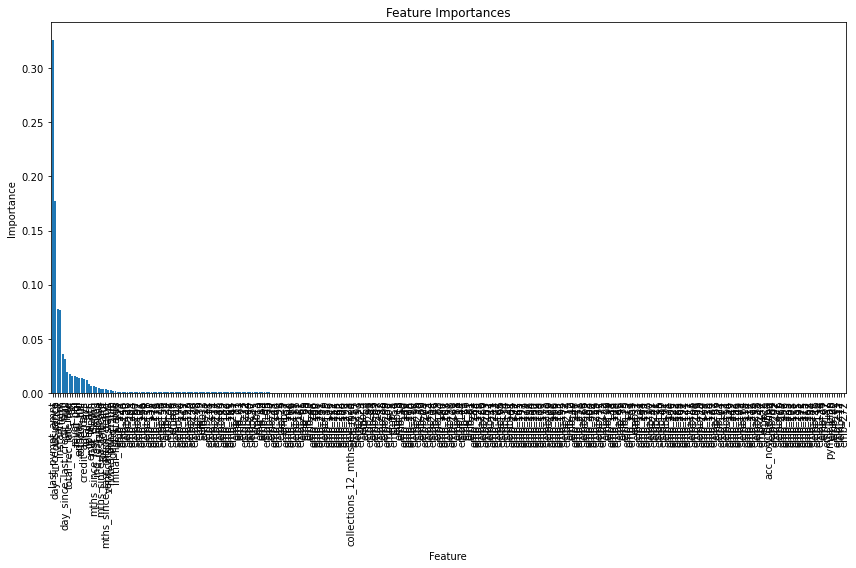

In [79]:
#Feature Importance 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
# Get feature importances
importances = dt_classifier.feature_importances_

# Sort indices of importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Top 20 Feature ranking:
1. Feature 'last_pymnt_amnt' (0.32593770239687186)
2. Feature 'day_since_issuance' (0.176938083218693)
3. Feature 'out_prncp' (0.07786741867647347)
4. Feature 'installment' (0.07701002579764565)
5. Feature 'term' (0.035728791707610195)
6. Feature 'day_since_last_credit_pull' (0.03138175408200581)
7. Feature 'int_rate' (0.01928741177855597)
8. Feature 'total_rec_late_fee' (0.017896875404315053)
9. Feature 'dti' (0.015762037895891822)
10. Feature 'revol_bal' (0.015172571489197529)
11. Feature 'revol_util' (0.014710122379709933)
12. Feature 'annual_inc' (0.013967195125351703)
13. Feature 'tot_cur_bal' (0.013324498655853568)
14. Feature 'credit_age_days' (0.012863283502127574)
15. Feature 'total_acc' (0.012057328634269542)
16. Feature 'open_acc' (0.008616782052864832)
17. Feature 'emp_length' (0.006611363436578425)
18. Feature 'mths_since_last_delinq' (0.00625172886782854)
19. Feature 'inq_last_6mths' (0.005694981106161685)
20. Feature 'purpose' (0.00431297704353282

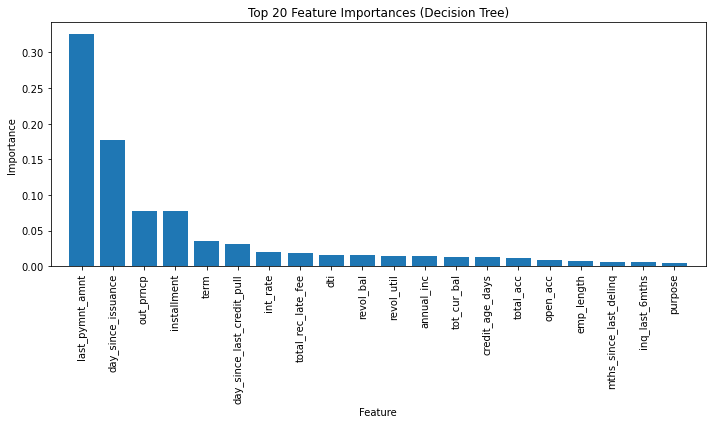

In [80]:
# Sort indices of importances in descending order
indices = np.argsort(importances)[::-1]

# Limit to top 20 features
top_n = 20
top_indices = indices[:top_n]
top_feature_names_d = [feature_names[i] for i in top_indices]
top_importances_d = importances[top_indices]

# Print the top 20 feature ranking
print("Top 20 Feature ranking:")
for f in range(top_n):
    print(f"{f + 1}. Feature '{top_feature_names_d[f]}' ({top_importances_d[f]})")

# Plot the top 20 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances (Decision Tree)")
plt.bar(range(top_n), top_importances_d, align="center")
plt.xticks(range(top_n), top_feature_names_d, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xlim([-1, top_n])
plt.tight_layout()
plt.show()

### 3. TFIDF Encoding

In [43]:
#Import required packages

import pandas as pd
import numpy as np
import string

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [44]:
loan_df = pd.read_csv('C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/cleaned_loan_df.csv')

C:\Users\nupur\AppData\Local\Temp/ipykernel_20208/2470922366.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('C:/Users/nupur/OneDrive/Desktop/practicum/Project Data/Data/cleaned_loan_df.csv')


In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Display the first few rows of the dataset
print(loan_df.head())

# Check if 'desc' column exists
if 'desc' not in loan_df.columns:
    raise ValueError("The 'desc' column does not exist in the dataset")

# Fill NaN values with an empty string
loan_df['desc'] = loan_df['desc'].fillna('')

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # You can adjust max_features as needed

# Fit and transform the 'desc' column
tfidf_matrix = tfidf_vectorizer.fit_transform(loan_df['desc'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

# Optionally, concatenate the TF-IDF DataFrame with the original DataFrame
loan_df_tfidf = pd.concat([loan_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the combined DataFrame
print(loan_df_tfidf.head())

   term  int_rate  installment  emp_length  home_ownership  annual_inc  \
0   0.0  0.253391     0.105571        1.00             1.0    0.003200   
1   1.0  0.477229     0.031671        0.05             1.0    0.004000   
2   0.0  0.510659     0.049243        1.00             1.0    0.001634   
3   0.0  0.390988     0.232113        1.00             1.0    0.006560   
4   1.0  0.352229     0.037380        0.10             1.0    0.010667   

   verification_status  pymnt_plan  \
0                  1.0         0.0   
1                  0.5         0.0   
2                  0.0         0.0   
3                  0.5         0.0   
4                  0.5         0.0   

                                                desc   purpose  \
0        I need to upgrade my business technologies.  0.076923   
1    I plan to use this money to finance the moto...  0.000000   
2                                                NaN  0.846154   
3    to pay for property tax (borrow from friend,...  0.692308

   term  int_rate  installment  emp_length  home_ownership  annual_inc  \
0   0.0  0.253391     0.105571        1.00             1.0    0.003200   
1   1.0  0.477229     0.031671        0.05             1.0    0.004000   
2   0.0  0.510659     0.049243        1.00             1.0    0.001634   
3   0.0  0.390988     0.232113        1.00             1.0    0.006560   
4   1.0  0.352229     0.037380        0.10             1.0    0.010667   

   verification_status  pymnt_plan  \
0                  1.0         0.0   
1                  0.5         0.0   
2                  0.0         0.0   
3                  0.5         0.0   
4                  0.5         0.0   

                                                desc   purpose  \
0        I need to upgrade my business technologies.  0.076923   
1    I plan to use this money to finance the moto...  0.000000   
2                                                     0.846154   
3    to pay for property tax (borrow from friend,...  0.692308

In [46]:
loan_df_tfidf.head()

,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,good_bad_loan,day_since_issuance,day_since_last_credit_pull,credit_age_days,00,000,09,10,100,11,12,13,14,15,17,18,20,200,24,25,29,30,300,36,50,500,99,able,about,account,accounts,accumulated,add,added,addition,additional,advance,after,again,ago,ahead,all,allow,almost,already,also,always,am,amount,amp,an,and,another,any,appreciate,approximately,apr,are,around,as,ask,at,auto,away,back,balance,balances,bank,banks,bathroom,be,because,become,been,before,being,believe,best,better,big,bill,bills,borrower,both,bought,br,budget,build,business,but,buy,buying,by,can,capital,car,card,cards,care,career,cash,cc,chase,clear,close,club,college,come,companies,company,complete,completely,consideration,considering,consolidate,consolidating,consolidation,continue,control,cost,costs,could,couple,cover,credit,current,currently,cut,date,daughter,day,debit,debt,debts,did,different,do,doing,dollars,don,done,down,due,during,each,early,easier,easy,eliminate,emergency,employed,employer,employment,end,enough,etc,even,ever,every,everyone,everything,excellent,existing,expenses,extra,family,far,faster,feel,fees,few,finally,finance,finances,financial,financially,finish,first,fix,fixed,flow,for,forward,found,free,from,full,fully,fund,funded,funding,funds,future,gas,get,getting,give,go,goal,going,good,got,great,greatly,had,half,hard,has,have,having,he,hello,help,helping,her,here,hi,high,higher,his,history,home,hope,hoping,house,how,however,if,im,improve,improvement,improvements,in,including,income,increase,incurred,industry,instead,insurance,interest,into,invest,investing,investment,investors,is,it,its,job,just,keep,kitchen,know,large,last,late,left,lending,lendingclub,less,let,life,like,line,little,live,living,ll,loan,loans,long,look,looking,lot,love,low,lower,made,major,make,makes,making,manage,many,market,married,may,me,medical,minimum,missed,money,month,monthly,months,more,mortgage,most,move,moving,much,multiple,my,myself,need,needed,needs,never,new,next,no,not,now,null,obligations,of,off,old,on,once,one,only,opportunity,or,order,other,our,out,outstanding,over,owe,own,paid,part,past,pay,paying,payment,payments,payoff,people,per,period,person,personal,place,plan,planning,please,plus,pool,position,possible,previous,problem,process,project,property,provide,purchase,purchased,purpose,put,questions,quicker,quickly,quot,rate,rates,rather,re,really,reason,recently,reduce,refinance,refinancing,reliable,remaining,remodel,rent,repair,repairs,repay,repayment,replace,request,requesting,responsible,rest,revolving,rid,right,roof,room,salary,same,save,saving,savings,school,score,second,secure,see,seeking,set,several,she,short,should,since,single,situation,small,smaller,so,some,son,soon,sooner,stable,start,started,starting,steady,still,student,such,support,take,taking,tax,taxes,term,than,thank,thanks,that,the,their,them,then,there,these,they,things,this,those,three,through,time,to,too,total,towards,track,truck,trying,two,under,unexpected,until,up,us,use,used,using,utilities,vacation,value,ve,vehicle,very,want,wanted,was,way,we,wedding,well,were,what,when,where,which,while,who,wife,will,wish,with,within,without,work,worked,working,would,year,years,you,your,yrs
0,0.0,0.253391,0.105571,1.00,1.0,0.003200,1.0,0.0,I need to upgrade my business technologies.,0.076923,Computer,0.691423,0.0,0.030303,1.000000,1.0,0.035714,0.005313,0.093803,0.051613,0.0,0.000000,0.000000,0.004736,0.0,1.0,0.0,0.000021,0.01735,1,0.6,1.000000,0.160132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00

In [47]:
loan_df_tfidf = loan_df_tfidf.drop(columns=['title','desc'])

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [49]:
# Assuming 'target' is your target variable
X = loan_df_tfidf.drop(columns=['good_bad_loan'])  # Features
y = loan_df_tfidf['good_bad_loan']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
#Decision Tree
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_preds = dt_classifier.predict(X_val)

# Evaluate the classifier
print("Decision Tree Validation Accuracy:", accuracy_score(y_val, y_val_preds))
print("Decision Tree Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_preds))
print("Decision Tree Validation Classification Report:\n", classification_report(y_val, y_val_preds))

Decision Tree Validation Accuracy: 0.9380781493501852
Decision Tree Validation Confusion Matrix:
 [[ 11441   4309]
 [  4353 119783]]
Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73     15750
           1       0.97      0.96      0.97    124136

    accuracy                           0.94    139886
   macro avg       0.84      0.85      0.85    139886
weighted avg       0.94      0.94      0.94    139886



In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_true = y_train  # Actual labels for training set
y_train_pred = dt_classifier.predict(X_train).flatten()  # Predicted labels for training set
y_val_true = y_val  # Actual labels for validation set
y_val_pred = dt_classifier.predict(X_val).flatten()  # Predicted labels for validation set

# Compute metrics for training set
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_f1 = f1_score(y_train_true, y_train_pred)

# Compute metrics for validation set
val_accuracy = accuracy_score(y_val_true, y_val_pred)
val_precision = precision_score(y_val_true, y_val_pred)
val_recall = recall_score(y_val_true, y_val_pred)
val_f1 = f1_score(y_val_true, y_val_pred)

# Confusion matrix for training and validation sets
train_confusion_matrix = confusion_matrix(y_train_true, y_train_pred)
val_confusion_matrix = confusion_matrix(y_val_true, y_val_pred)

# Print results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print("Confusion Matrix:")
print(val_confusion_matrix)

Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 36436      0]
 [     0 289963]]

Validation Metrics:
Accuracy: 0.9381
Precision: 0.9653
Recall: 0.9649
F1 Score: 0.9651
Confusion Matrix:
[[ 11441   4309]
 [  4353 119783]]


In [52]:
#As per training metrics we can see that, the model is overfitted. We tune hyperparameters
# Pre-pruning: Create and train a decision tree with pre-pruning
pre_pruned_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
pre_pruned_dt.fit(X_train, y_train)

# Evaluate the pre-pruned tree on the validation set
pre_pruned_val_preds = pre_pruned_dt.predict(X_val)
print("Pre-Pruned Decision Tree Validation Accuracy:", accuracy_score(y_val, pre_pruned_val_preds))
print("Pre-Pruned Decision Tree Validation Confusion Matrix:\n", confusion_matrix(y_val, pre_pruned_val_preds))
print("Pre-Pruned Decision Tree Validation Classification Report:\n", classification_report(y_val, pre_pruned_val_preds))

Pre-Pruned Decision Tree Validation Accuracy: 0.943646969675307
Pre-Pruned Decision Tree Validation Confusion Matrix:
 [[  9365   6385]
 [  1498 122638]]
Pre-Pruned Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.59      0.70     15750
           1       0.95      0.99      0.97    124136

    accuracy                           0.94    139886
   macro avg       0.91      0.79      0.84    139886
weighted avg       0.94      0.94      0.94    139886



In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_true = y_train  # Actual labels for training set
y_train_pred = pre_pruned_dt.predict(X_train).flatten()  # Predicted labels for training set
y_val_true = y_val  # Actual labels for validation set
y_val_pred = pre_pruned_dt.predict(X_val).flatten()  # Predicted labels for validation set

# Compute metrics for training set
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_f1 = f1_score(y_train_true, y_train_pred)

# Compute metrics for validation set
val_accuracy = accuracy_score(y_val_true, y_val_pred)
val_precision = precision_score(y_val_true, y_val_pred)
val_recall = recall_score(y_val_true, y_val_pred)
val_f1 = f1_score(y_val_true, y_val_pred)

# Confusion matrix for training and validation sets
train_confusion_matrix = confusion_matrix(y_train_true, y_train_pred)
val_confusion_matrix = confusion_matrix(y_val_true, y_val_pred)

# Print results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print("Confusion Matrix:")
print(val_confusion_matrix)

Training Metrics:
Accuracy: 0.9445
Precision: 0.9518
Recall: 0.9876
F1 Score: 0.9694
Confusion Matrix:
[[ 21921  14515]
 [  3588 286375]]

Validation Metrics:
Accuracy: 0.9436
Precision: 0.9505
Recall: 0.9879
F1 Score: 0.9689
Confusion Matrix:
[[  9365   6385]
 [  1498 122638]]


## The End